# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('main_task.csv')

In [3]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [17]:
df.drop(df.select_dtypes(['object']), inplace=True, axis=1)
df.head()

,Ranking,Rating,Number of Reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0
3,3458.0,5.0,3.0
4,621.0,4.0,84.0


In [18]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean(),0))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Rating             40000 non-null  float64
 2   Number of Reviews  40000 non-null  float64
dtypes: float64(3)
memory usage: 937.6 KB


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [19]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [20]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [21]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [22]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [23]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [24]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.42708577698412703


1. count_cuisine -  количество видов кухни, 2. diff_date - промежуток времени между комментариями, 3. Price_Range - из символьного преобразован в числовой, 4. Price_Range_median - медианные значения диапазона цен в ресторане по городам 5. Number_of_Reviews_means -среднее количество отзывов о ресторане по каждому городу, 6.dayspass - количество дней прошедших со дня публикации последнего отзыва


In [ ]:
0.2171835

In [ ]:
Выделение дат и отзывов из Reviews

In [ ]:
Ввести переменный который снизили бы MAE меньше 0.21

Restaurant_id — идентификационный номер ресторана / сети ресторанов;
City — город, в котором находится ресторан;
Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
Price Range — диапазон цен в ресторане;
Number of Reviews — количество отзывов о ресторане;
Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
URL_TA — URL страницы ресторана на TripAdvosor;
ID_TA — идентификатор ресторана в базе данных TripAdvisor.

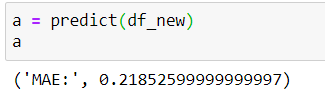